## Plot data statistical information before and after score curation

### Figures: data statistical information before and after score curation

/home/jlpang/LLM_data_selection/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 10000 examples [00:00, 82916.78 examples/s]


total count: Counter({'wizardlm': 7177, 'flan_v2': 1621, 'dolly': 879, 'oasst1': 180, 'stanford_alpaca': 143})


Generating train split: 10000 examples [00:00, 118573.60 examples/s]


total count: Counter({'wizardlm': 7247, 'flan_v2': 1604, 'dolly': 850, 'oasst1': 191, 'stanford_alpaca': 108})


Generating train split: 10000 examples [00:00, 147719.01 examples/s]


total count: Counter({'wizardlm': 6418, 'flan_v2': 1962, 'dolly': 766, 'stanford_alpaca': 571, 'oasst1': 283})


Generating train split: 10000 examples [00:00, 153538.52 examples/s]


total count: Counter({'wizardlm': 6019, 'flan_v2': 2124, 'dolly': 799, 'stanford_alpaca': 656, 'oasst1': 402})


Generating train split: 10000 examples [00:00, 146154.20 examples/s]


total count: Counter({'wizardlm': 6832, 'flan_v2': 1387, 'dolly': 1071, 'stanford_alpaca': 608, 'oasst1': 102})


Generating train split: 10000 examples [00:00, 161113.04 examples/s]


total count: Counter({'wizardlm': 6452, 'dolly': 1210, 'flan_v2': 1127, 'stanford_alpaca': 710, 'oasst1': 501})


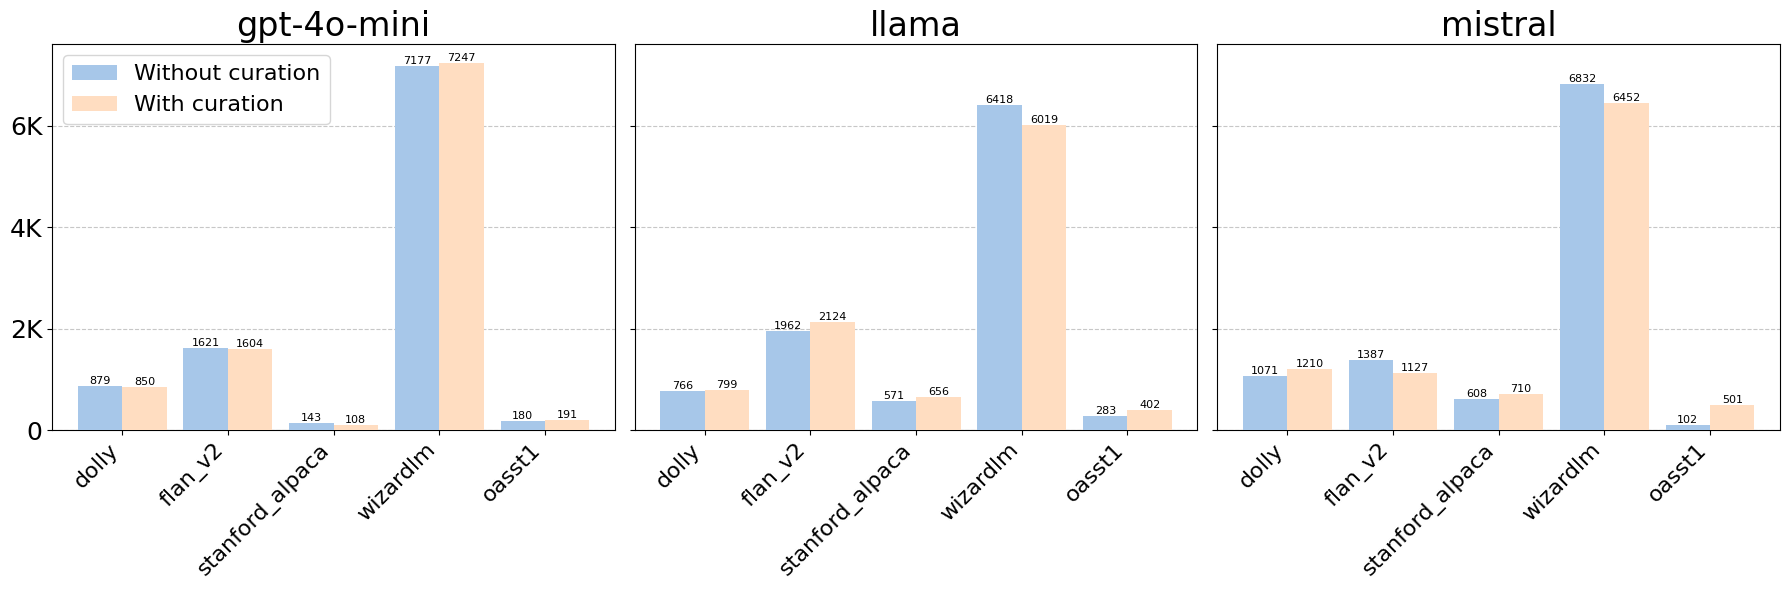

In [9]:
import os
import numpy as np
from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

MODEL_LIST = ['gpt-4o-mini', 'llama', 'mistral']

root_path = "model_finetune/new_train_data/"
bar_width = 0.42  
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# dataset 
sorted_labels = ['dolly', 'flan_v2',  'stanford_alpaca', 'wizardlm', 'oasst1']

for i, model_name in enumerate(MODEL_LIST):

    data_path = root_path + f"{model_name}/"
    files = os.listdir(data_path)

    for file_idx, file in enumerate(files):
        if 'cured' in file:
            data_type_tag = 'Without curation'
            color = '#A7C7E9'
        else:
            data_type_tag = 'With curation'
            color = '#FFDDC1'

        data = load_dataset('json', data_files=data_path + file)['train']
        dataset_proportion = [item.rsplit('_', 1)[0] for item in data['id']]

        # wizardlm contains wizardlm_alpaca
        for dp_idx, item in enumerate(dataset_proportion):
            if 'wizardlm' in item:
                dataset_proportion[dp_idx] = 'wizardlm'

        counter = Counter(dataset_proportion)
        print(f"total count: {counter}")

        counts = [counter[label] if label in counter else 0 for label in sorted_labels]

        x = np.arange(len(sorted_labels)) + (file_idx * bar_width)

        bars = axs[i].bar(x, counts, bar_width, label=data_type_tag, color=color, zorder=3)

        for bar in bars:
            yval = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    # Axis y
    def human_format(x, pos):
        if x >= 1e6:
            return f'{x * 1e-6:.1f}M'
        elif x >= 1e3:
            return f'{x * 1e-3:.0f}K'
        else:
            return f'{x:.0f}'

    axs[i].yaxis.set_major_formatter(FuncFormatter(human_format))

    axs[i].set_title(f'{model_name}', fontsize=24)
    # axs[i].set_xlabel('Scores', fontsize=24)

    axs[i].tick_params(axis='x', rotation=45, labelsize=16, direction='out')

    axs[i].tick_params(axis='y', labelsize=18)

    axs[i].set_xticks(np.arange(len(sorted_labels)) + bar_width / 2)  
    axs[i].set_xticklabels(sorted_labels, rotation=45, ha='right')  

axs[0].legend(loc='upper left', fontsize=16)

for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()


### Figure: score distribution before and after score curation

In [ ]:
import os
import torch
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

models = ["gpt-4o-mini", "meta-llama/Meta-Llama-3.1-8B-Instruct", "mistralai/Mistral-7B-Instruct-v0.3"]
root_path = "./model_finetune/new_train_data/"

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, model_name in enumerate(models):

    path_original = root_path + f"{model_name}/all_train/output_labels_revised.pt"
    path_cured = root_path + f"{model_name}/all_train/output_labels_revised_cured.pt"

    all_labels_original = torch.load(path_original)
    all_labels_cured = torch.load(path_cured)

    if model_name == "gpt-4o-mini":
        model_name = "GPT-4o-mini"
    elif model_name == "meta-llama/Meta-Llama-3.1-8B-Instruct":
        model_name = "LlaMA-3.1-8B-Instruct"
    else:
        model_name = "Mistral-7B-Instruct-v0.3"

    label_counts_original = Counter(all_labels_original)
    label_counts_cured = Counter(all_labels_cured)

    labels = list(label_counts_original.keys())  
    counts_original = [label_counts_original[label] for label in labels]
    counts_cured = [label_counts_cured[label] for label in labels]

    bar_width = 0.42  

    bars_original = axs[i].bar(labels, counts_original, bar_width, label='Raw score', color='#A7C7E9', zorder=3)
    bars_cured = axs[i].bar([x + bar_width for x in labels], counts_cured, bar_width, label='Curated score', color='#FFDDC1', zorder=3)

    for bar in bars_original:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    for bar in bars_cured:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)
        
    def human_format(x, pos):
        if x >= 1e6:
            return f'{x*1e-6:.1f}M'
        elif x >= 1e3:
            return f'{x*1e-3:.0f}K'
        else:
            return f'{x:.0f}'
    
    axs[i].yaxis.set_major_formatter(FuncFormatter(human_format))

    axs[i].set_title(f'{model_name.split("/")[-1]}', fontsize=24)
    axs[i].set_xlabel('Scores', fontsize=24)

    axs[i].tick_params(axis='x', rotation=0, labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

    y_ticks = range(0, int(max(counts_original + counts_cured) + 25000), 25000)
    axs[i].set_yticks(y_ticks)
    axs[i].tick_params(axis='y', labelsize=18)

axs[0].legend(loc='upper left', fontsize=20)


for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()
